# Verification of the pipeline on Keras

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import shutil

# Project
project_common_path = os.path.dirname('.')
project_common_path = os.path.abspath(os.path.join(project_common_path, '..', 'common'))
if not project_common_path in sys.path:
    sys.path.append(project_common_path)


In [3]:
from models.keras_unet import get_unet


Using TensorFlow backend.


In [13]:
params = {
    'input_shape': (512, 768, 3),
    'n_classes': 1,
    'depth': 4,
    'n_filters': 32
}

In [17]:
unet = get_unet(**params)

In [18]:
unet.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
data (InputLayer)                (None, 512, 768, 3)   0                                            
____________________________________________________________________________________________________
encoder_0a_conv (Conv2D)         (None, 512, 768, 32)  864         data[0][0]                       
____________________________________________________________________________________________________
encoder_0a_bn (BatchNormalizatio (None, 512, 768, 32)  128         encoder_0a_conv[0][0]            
____________________________________________________________________________________________________
encoder_0a_act (LeakyReLU)       (None, 512, 768, 32)  0           encoder_0a_bn[0][0]              
___________________________________________________________________________________________

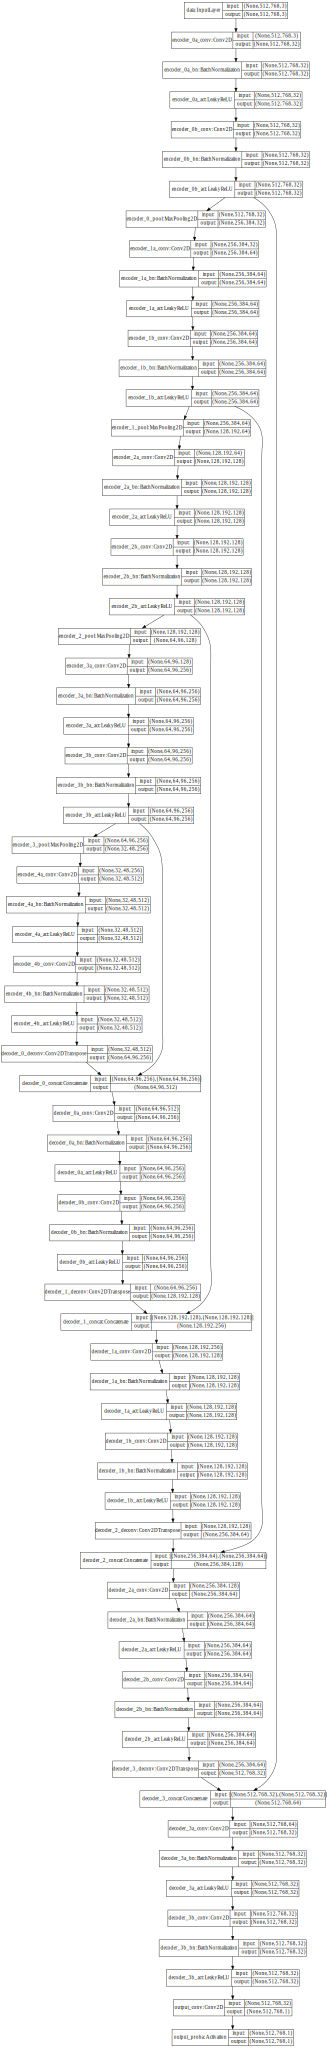

In [19]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

SVG(model_to_dot(unet, show_shapes=True).create(prog='dot', format='svg'))

In [27]:
import numpy as np
from data_utils import train_ids
from xy_providers import image_mask_provider

In [25]:
seed = 2017
np.random.seed(seed)


check_mode = True

In [26]:
trainval_id_type_list = [(image_id, "Train") for image_id in train_ids]
np.random.shuffle(trainval_id_type_list)

if check_mode:
    trainval_id_type_list = trainval_id_type_list[:20]    


print(len(trainval_id_type_list))

20


In [ ]:
params = {
    'seed': seed,

    'xy_provider': image_mask_provider,

    'network': get_unet,

    'loss': '',
    'nb_epochs': 30,
    'batch_size': 8,

    'normalize_data': True,
    'normalization': 'vgg',

    'image_size': (128, 128),

    'optimizer': 'adam',
    # Learning rate scheduler
    'lr_kwargs': {
        'lr': 0.0001,
        'a': 0.95,
        'init_epoch': 0
    },
    'lr_decay_f': exp_decay,

    'EpochValidationCallback_rate': 5,

    # Reduce learning rate on plateau
    'on_plateau': True,
    'on_plateau_kwargs': {
        'monitor': 'val_loss',
        'factor': 0.1,
        'patience': 3,
        'verbose': 1
    },

    'cache': cache,

    # 'class_index': 0,
    # 'pretrained_model': 'load_best',
    # 'pretrained_model': os.path.join(GENERATED_DATA, "weights", ""),

    'output_path': OUTPUT_PATH,
}

In [ ]:
if check_mode:
    params['nb_epochs'] = 2
    params['batch_size'] = 2